In [22]:
library(leaps)

In [23]:
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


In [24]:
cor(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.0000000,0.35307918,-0.6458827,-0.66378886,0.4636847,0.41655603
Agriculture,0.3530792,1.00000000,-0.6865422,-0.63952252,0.4010951,-0.06085861
Examination,-0.6458827,-0.68654221,1.0000000,0.69841530,-0.5727418,-0.11402160
Education,-0.6637889,-0.63952252,0.6984153,1.00000000,-0.1538589,-0.09932185
Catholic,0.4636847,0.40109505,-0.5727418,-0.15385892,1.0000000,0.17549591
Infant.Mortality,0.4165560,-0.06085861,-0.1140216,-0.09932185,0.1754959,1.00000000


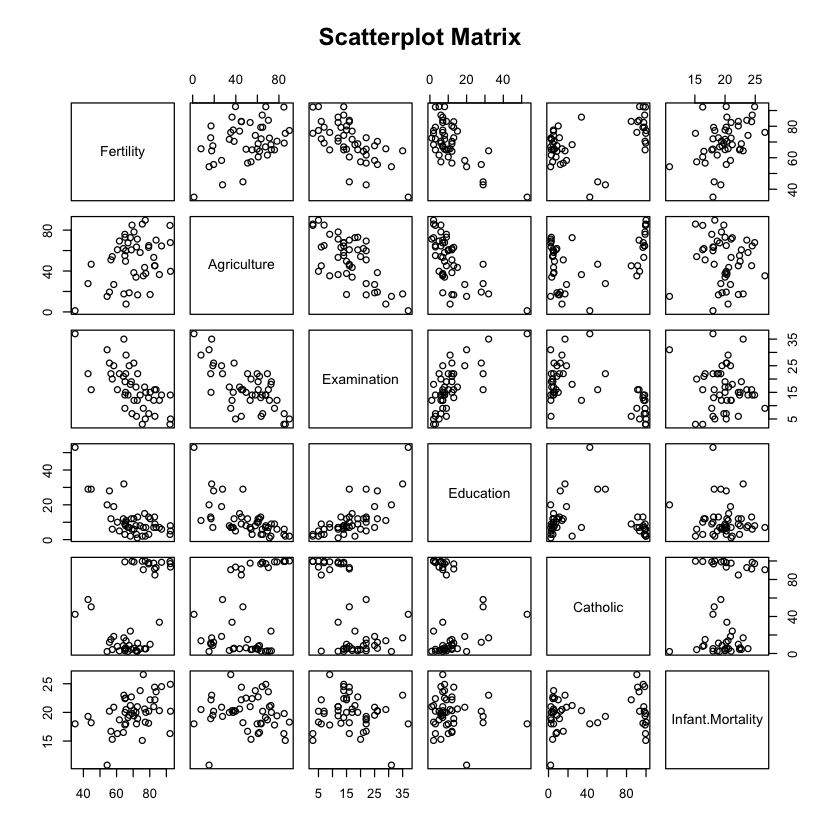

In [25]:
pairs(swiss, main = "Scatterplot Matrix")

In [26]:
model <- lm(Fertility ~., data = swiss)
summary(model)


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


- Biến Examination không có ý nghĩa trong mô hình thống kê
=> Loại biến này khỏi dữ liệu và xây dựng lại mô hình

In [30]:
data_new = swiss[,c("Fertility","Agriculture", "Education", "Catholic", "Infant.Mortality")]
head(data_new)

,Fertility,Agriculture,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,12,9.96,22.2
Delemont,83.1,45.1,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,93.40,20.2
Moutier,85.8,36.5,7,33.77,20.3
Neuveville,76.9,43.5,15,5.16,20.6
Porrentruy,76.1,35.3,7,90.57,26.6


In [28]:
model <- lm(Fertility ~., data = data_new)
summary(model)


Call:
lm(formula = Fertility ~ ., data = data_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10


In [39]:
model = regsubsets(Fertility~., data = swiss, nvmax = 5)#, method = "seqrep")
summary(model)

Subset selection object
Call: regsubsets.formula(Fertility ~ ., data = swiss, nvmax = 5)
5 Variables  (and intercept)
                 Forced in Forced out
Agriculture          FALSE      FALSE
Examination          FALSE      FALSE
Education            FALSE      FALSE
Catholic             FALSE      FALSE
Infant.Mortality     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         Agriculture Examination Education Catholic Infant.Mortality
1  ( 1 ) " "         " "         "*"       " "      " "             
2  ( 1 ) " "         " "         "*"       "*"      " "             
3  ( 1 ) " "         " "         "*"       "*"      "*"             
4  ( 1 ) "*"         " "         "*"       "*"      "*"             
5  ( 1 ) "*"         "*"         "*"       "*"      "*"             

In [40]:
summary(model)$cp

[1] 35.204895 18.486158  8.178162  5.032800  6.000000

- Giả sử nói về mô hình logistic
- Có bệnh covid hay không, biến

# BIẾN GIẢ - DUMMY

In [41]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


- 150 quan sát (3 loài, mỗi loài có 50 quan sát)
- 5 biến

In [43]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


- Biến định tính: biến dummy, biến giả: 
- Đang xét: Những biến x
- Vấn đề đặt ra: 
    - X: là biến giới tính: Nhận giá trị 1 nếu là Nam, gtri = 0 nếu là nữ
    - Y: tiền lương: giới tính có ảnh hưởng đến lương ở Việt nam hay không?

#### Giả sử: X là biến phân loại học sinh: Xuất sắc, khá, yéu: Nếu X có j loại thì cần j-1 biến dummy
- D1: 
    - 1: Nếu xuất sắc
    - 0: Nếu không suất sắc
- D2:
    - 1: Nếu khá
    - 0: Nếu không khá
Khi đó nếu D1 = 0 và D2 = 0 thì sẽ được yếu

In [44]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [46]:
mod1 = lm(Sepal.Length ~., data = iris)
summary(mod1)


Call:
lm(formula = Sepal.Length ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79424 -0.21874  0.00899  0.20255  0.73103 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.17127    0.27979   7.760 1.43e-12 ***
Sepal.Width        0.49589    0.08607   5.761 4.87e-08 ***
Petal.Length       0.82924    0.06853  12.101  < 2e-16 ***
Petal.Width       -0.31516    0.15120  -2.084  0.03889 *  
Speciesversicolor -0.72356    0.24017  -3.013  0.00306 ** 
Speciesvirginica  -1.02350    0.33373  -3.067  0.00258 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3068 on 144 degrees of freedom
Multiple R-squared:  0.8673,	Adjusted R-squared:  0.8627 
F-statistic: 188.3 on 5 and 144 DF,  p-value: < 2.2e-16


In [47]:
# Khoảng tin cậy
confint(mod1)

,2.5 %,97.5 %
(Intercept),1.6182321,2.72430044
Sepal.Width,0.3257653,0.66601260
Petal.Length,0.6937939,0.96469395
Petal.Width,-0.6140049,-0.01630542
Speciesversicolor,-1.1982739,-0.24885002
Speciesvirginica,-1.6831329,-0.36386273
